In [142]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

In [143]:
data_T = pd.read_csv('d.csv')

In [144]:
data = data_T.T[1:]

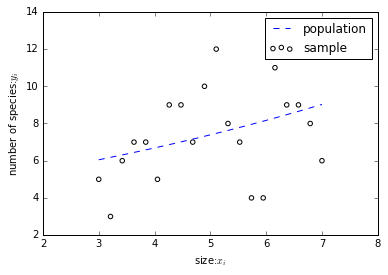

In [145]:
plt.scatter(data[0],data[1],facecolor='none',label='sample')
plt.plot(np.linspace(3,7,10),np.exp(1.5+0.1*np.linspace(3,7,10)),'--',label='population')
plt.legend(loc='upper right')
plt.xlabel('size:$x_{i}$')
plt.ylabel('number of species:$y_{i}$')

In [146]:
data.x_c = sm.add_constant(data[0])
result = sm.GLM(data[1],data.x_c,family=sm.families.Poisson()).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      1   No. Observations:                   20
Model:                            GLM   Df Residuals:                       18
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -45.018
Date:                Sun, 31 Jul 2016   Deviance:                       14.171
Time:                        23:09:24   Pearson chi2:                     13.6
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.5661      0.360      4.351      0.000         0.861     2.272
0              0.0833      0.068      1.219      0.223        -0.051     0.217
==============================================================================
"""

無情報事前分布
- 一様分布
- 平べったい正規分布

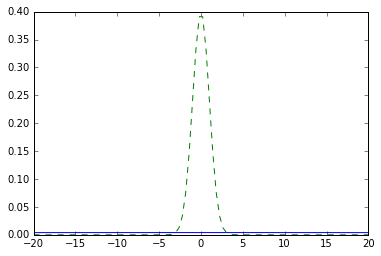

In [147]:
y = np.linspace(-20,20,100)
plt.plot(y,stats.norm.pdf(y,0,100))
plt.plot(y,stats.norm.pdf(y,0,1),'--')
plt.show()

In [148]:
import pymc

In [194]:
basic_model = pymc.Model()
beta1 = pymc.Normal('beta1',0.,tau=1.0e-3)
beta2 = pymc.Normal('beta2',0.,tau=1.0e-3)

@pymc.deterministic(plot=False)
def mu(beta1=beta1,beta2=beta2,x=data.x_c[0]):
    return np.exp(beta1 + beta2*(x - x.mean()))

Y_obs = pymc.Poisson('Y_obs',mu=mu,value=data[1],observed=True)

model = pymc.Model([beta1,beta2,Y_obs])
start = pymc.MCMC(model)
start.sample(iter=105000, burn=5000, thin=10)

 [-----------------100%-----------------] 105000 of 105000 complete in 139.5 sec

Plotting beta2
Plotting beta1


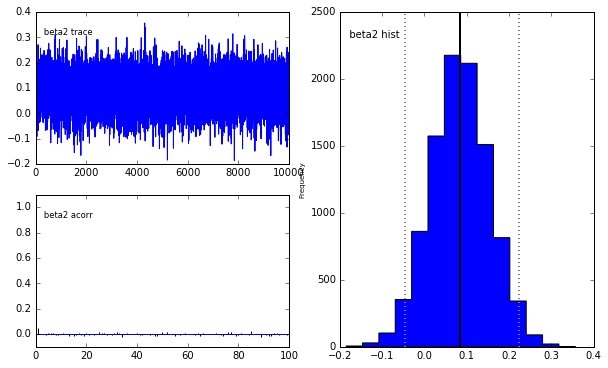

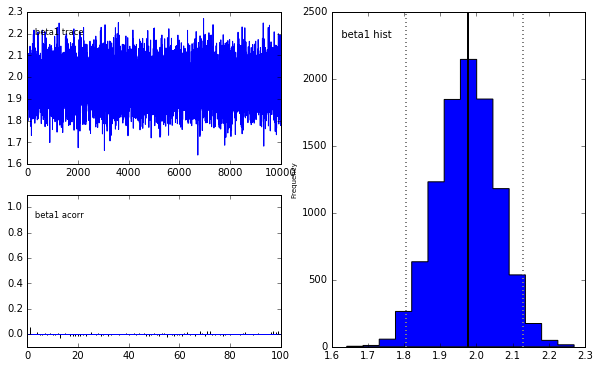

In [195]:
pymc.Matplot.plot(start)

In [196]:
beta1.stats()

{'95% HPD interval': array([ 1.80531712,  2.12767305]),
 'mc error': 0.00077899684065083096,
 'mean': 1.974721865355094,
 'n': 10000,
 'quantiles': {2.5: 1.8108873766456379,
  25: 1.919404122736482,
  50: 1.9757414915898999,
  75: 2.0306034398726487,
  97.5: 2.133948219724576},
 'standard deviation': 0.082472441189269843}

In [201]:
beta2.stats()

{'95% HPD interval': array([-0.04559177,  0.22384032]),
 'mc error': 0.00076514987264777947,
 'mean': 0.084175486833927796,
 'n': 10000,
 'quantiles': {2.5: -0.050506277851362025,
  25: 0.037873396408854204,
  50: 0.084170378020823819,
  75: 0.13064141310370642,
  97.5: 0.21968086808908402},
 'standard deviation': 0.069191623156749274}

In [204]:
def draw_figure_9_6(mcmc):
    beta1_samples = mcmc.trace('beta1')[:,None]
    beta2_samples = mcmc.trace('beta2')[:,None]
    N = 1000
    M = 100
    b1s = beta1_samples[:]
    b2s = beta2_samples[:]
    
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(data[0],data[1],'ko', alpha=0.4)
    xx = np.linspace(7,13,N)
    yy = np.exp(b1s + ((xx - data[0].mean()).T * b2s))
    
    [ax1.plot(xx,yy[i], 'k-',alpha=0.1) for i in np.random.randint(0,len(b1s),M)]
    ax1.plot(xx,yy.mean(axis=0),'k-',lw=2)
    ax1.set_xlabel('size of plant')
    ax1.set_ylabel('# of seeds')
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.plot(b1s,b2s,'k.',alpha=0.2)
    ax2.set_xlabel('intercept')
    ax2.set_ylabel('slope')

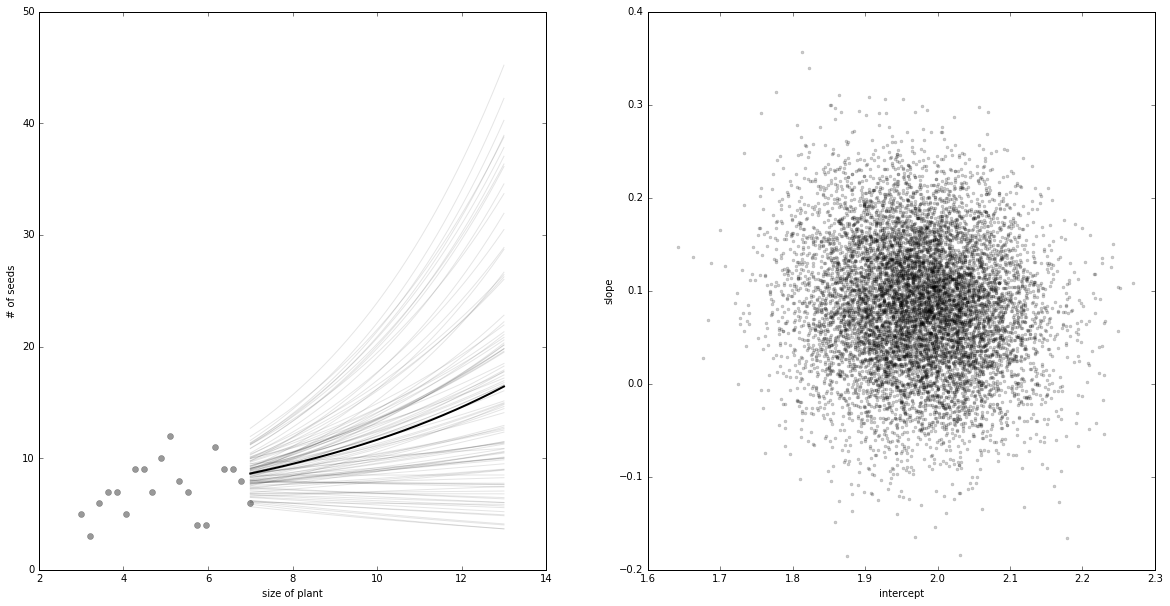

In [205]:
draw_figure_9_6(start)
plt.show()

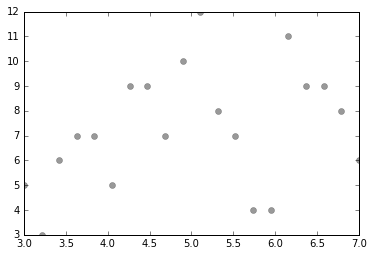

In [200]:
plt.plot(data[0],data[1],'ko', alpha=0.4)